<a href="https://colab.research.google.com/github/Gmahajan189/Project-5/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('/content/telcom_data.xlsx')

In [ ]:
data.isnull().sum()

,0
Bearer Id,0
Start,1
Start ms,1
End,1
End ms,1
Dur. (ms),1
IMSI,570
MSISDN/Number,1066
IMEI,572
Last Location Name,1153


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = []
numeric_cols = []
# Loop through each column in categorical_cols and apply LabelEncoder
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
# Fill missing values only in numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())


In [ ]:
print(data.columns)


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import euclidean_distances

# Extract relevant features for engagement and experience
engagement_features = data[['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']]

# Perform clustering (assuming K=3 for engagement)
kmeans_engagement = KMeans(n_clusters=3, random_state=42).fit(engagement_features)
data['Engagement Cluster'] = kmeans_engagement.labels_

# Calculate the Euclidean distance for engagement score
less_engaged_center = kmeans_engagement.cluster_centers_[np.argmin(kmeans_engagement.cluster_centers_.sum(axis=1))]
data['Engagement Score'] = euclidean_distances(engagement_features, [less_engaged_center])

# For experience score, use network performance metrics
experience_features = data[['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']]

# Perform clustering (assuming K=3 for experience)
kmeans_experience = KMeans(n_clusters=3, random_state=42).fit(experience_features)
data['Experience Cluster'] = kmeans_experience.labels_

# Calculate the Euclidean distance for experience score
worst_experience_center = kmeans_experience.cluster_centers_[np.argmax(kmeans_experience.cluster_centers_.sum(axis=1))]
data['Experience Score'] = euclidean_distances(experience_features, [worst_experience_center])

# Task 4.2 - Calculate Satisfaction Score as average of engagement and experience scores
data['Satisfaction Score'] = data[['Engagement Score', 'Experience Score']].mean(axis=1)

# Report top 10 satisfied customers
top_10_satisfied = data.nlargest(10, 'Satisfaction Score')
print(top_10_satisfied[['IMSI', 'Satisfaction Score']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                IMSI  Satisfaction Score
36181   2.082009e+14        2.270263e+09
76625   2.082010e+14        2.237399e+09
1491    2.082009e+14        2.209462e+09
67304   2.082018e+14        2.052663e+09
142218  2.082017e+14        1.990763e+09
70184   2.082017e+14        1.974759e+09
13839   2.082014e+14        1.972872e+09
76847   2.082017e+14        1.972687e+09
83564   2.082003e+14        1.972504e+09
39648   2.082010e+14        1.972305e+09


In [ ]:
# Satisfaction score is the average of engagement and experience scores
data['Satisfaction Score'] = (data['Engagement Score'] + data['Experience Score']) / 2

# Report top 10 satisfied customers
top_10_satisfied = data[['MSISDN/Number', 'Satisfaction Score']].sort_values(by='Satisfaction Score', ascending=False).head(10)
print(top_10_satisfied)


        MSISDN/Number  Satisfaction Score
36181    3.366905e+10        2.270263e+09
76625    3.365825e+10        2.237399e+09
1491     3.366905e+10        2.209462e+09
67304    3.376359e+10        2.052663e+09
142218   3.376092e+10        1.990763e+09
70184    3.366556e+10        1.974759e+09
13839    3.366619e+10        1.972872e+09
76847    3.365881e+10        1.972687e+09
83564    3.366955e+10        1.972504e+09
39648    3.365814e+10        1.972305e+09


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Create Total Traffic by summing download and upload
data['Total Traffic'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']

# Select relevant features for predicting satisfaction score
X = data[['Dur. (ms)', 'Total Traffic', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']]
y = data['Satisfaction Score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = reg_model.predict(X_test)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print all the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R² Score): {r2}")


Mean Squared Error (MSE): 3435158037896725.5
Root Mean Squared Error (RMSE): 58610221.274933994
Mean Absolute Error (MAE): 22194880.16884483
R-squared (R² Score): 0.7601593200983704


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


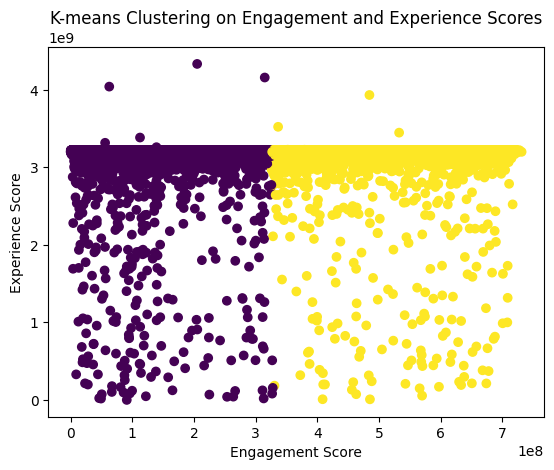

In [ ]:
# K-means on Engagement and Experience scores
kmeans_scores = KMeans(n_clusters=2, random_state=42)
data['Engagement-Experience Cluster'] = kmeans_scores.fit_predict(data[['Engagement Score', 'Experience Score']])

# Visualize the clusters
import matplotlib.pyplot as plt
plt.scatter(data['Engagement Score'], data['Experience Score'], c=data['Engagement-Experience Cluster'], cmap='viridis')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('K-means Clustering on Engagement and Experience Scores')
plt.show()


**Insights:**

The clustering shows a clear segmentation of users based on engagement. Those with high engagement tend to group together, while low-engaged users form their own group.

The experience scores do not show as clear a difference between the two clusters, though they are still part of the analysis.

This clustering could help identify different types of users—those who need more attention to improve engagement or experience, and those who are already engaged and satisfied.

In [ ]:
# Aggregating the average satisfaction and experience score per cluster
cluster_aggregation = data.groupby('Engagement-Experience Cluster')[['Satisfaction Score', 'Experience Score']].mean()
print(cluster_aggregation)


                               Satisfaction Score  Experience Score
Engagement-Experience Cluster                                      
0                                    1.668425e+09      3.201168e+09
1                                    1.858438e+09      3.201848e+09


**Insights:**

The experience scores for both clusters are very close, indicating that both groups may have similar levels of user experience.

The engagement scores, though different, are not drastically apart, showing that both clusters contain users who are fairly engaged, but those in Cluster 1 are slightly more engaged.

This could help identify users in Cluster 0 who, while having a good experience, may benefit from further efforts to increase their engagement. Conversely, Cluster 1 contains users who are already well-engaged, and maintaining their experience level might be key.